## Denoising 

 - wavelets

In [17]:
import matplotlib.pyplot as plt

from skimage.restoration import (
    denoise_wavelet,
    estimate_sigma,
)
from skimage import data, img_as_float
from skimage.util import random_noise

import pandas as pd

In [18]:
train_images = pd.read_csv('data/original/train/train_images.csv', header=None)

image_shape = (110,110)

import pandas as pd

# Supondo que 'df' seja o seu DataFrame
has_nan = train_images.isna().any().any()
print("Há algum NaN no DataFrame?", has_nan)

Há algum NaN no DataFrame? False


In [51]:
import pandas as pd
import numpy as np
import cv2
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Classe GaussianBlur conforme fornecida
class GaussianBlur(BaseEstimator, TransformerMixin):
    def __init__(self, kernel_size=7):
        self.kernel_size = kernel_size

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return cv2.GaussianBlur(X, (self.kernel_size, self.kernel_size), 0)

# Carregar o dataset
df = pd.read_csv('data/original/train/train_images.csv', header=None)

# Converter os dados do DataFrame para o formato de imagem (110x110)
images = df.values.reshape(-1, 110, 110).astype(np.float32)

# Definir o pipeline com apenas o GaussianBlur
blur_pipeline = Pipeline([
    ('gaussian_blur', GaussianBlur(kernel_size=3))
])

# Aplicar o pipeline às imagens
blurred_images = np.array([blur_pipeline.transform(img) for img in images])

# Se desejar salvar o resultado de volta ao DataFrame
blurred_images_df = pd.DataFrame(blurred_images.reshape(len(blurred_images), -1))

blurred_images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,87.00,88.375,93.625,99.00,96.625,92.750,93.500,88.50,85.625,96.625,...,107.625,99.750,93.875,95.125,98.875,100.875,105.375,106.500,100.625,96.75
1,96.00,96.125,95.125,93.75,94.000,95.125,97.125,100.00,101.625,98.875,...,98.500,98.000,99.250,103.000,107.250,109.125,105.875,97.125,88.625,85.75
2,84.50,80.875,78.625,83.00,86.125,87.250,92.125,96.25,94.875,91.375,...,82.500,82.250,91.125,95.625,90.250,86.625,86.125,84.625,86.375,88.75
3,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,93.125,89.250,90.500,88.125,87.750,93.250,91.625,85.125,85.250,87.50
4,118.25,121.875,126.250,121.75,114.875,114.375,116.125,118.50,119.125,115.000,...,114.875,115.125,108.125,102.625,104.250,106.750,107.875,108.250,108.625,109.50


In [4]:
import pandas as pd
import numpy as np
import cv2
from skimage import img_as_float
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Classe para Normalização
class Normalize(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.astype('float32') / 255.0

# Classe para GaussianBlur
class GaussianBlur(BaseEstimator, TransformerMixin):
    def __init__(self, kernel_size=7):
        self.kernel_size = kernel_size

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return cv2.GaussianBlur(X, (self.kernel_size, self.kernel_size), 0)

# Converter os dados do DataFrame para o formato de imagem (110x110)
images = train_images.values.reshape(-1, 110, 110).astype(np.float32)

# Definir o pipeline com Normalization seguido por GaussianBlur
pipeline = Pipeline([
    ('normalize', Normalize()),
    ('gaussian_blur', GaussianBlur(kernel_size=3))
])

# Aplicar o pipeline às imagens
processed_images = np.array([pipeline.transform(img) for img in images])

# Se desejar salvar o resultado de volta ao DataFrame
processed_images_df = pd.DataFrame(processed_images.reshape(len(processed_images), -1))

processed_images_df.head()


,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.341176,0.346569,0.367157,0.388235,0.378922,0.363725,0.366667,0.347059,0.335784,0.378922,...,0.422059,0.391176,0.368137,0.373039,0.387745,0.395588,0.413235,0.417647,0.394608,0.379412
1,0.376471,0.376961,0.373039,0.367647,0.368627,0.373039,0.380882,0.392157,0.398529,0.387745,...,0.386275,0.384314,0.389216,0.403922,0.420588,0.427941,0.415196,0.380882,0.347549,0.336275
2,0.331373,0.317157,0.308333,0.325490,0.337745,0.342157,0.361275,0.377451,0.372059,0.358333,...,0.323529,0.322549,0.357353,0.375000,0.353922,0.339706,0.337745,0.331863,0.338726,0.348039
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.365196,0.350000,0.354902,0.345588,0.344118,0.365686,0.359314,0.333824,0.334314,0.343137
4,0.463726,0.477941,0.495098,0.477451,0.450490,0.448529,0.455392,0.464706,0.467157,0.450980,...,0.450490,0.451471,0.424020,0.402451,0.408824,0.418627,0.423039,0.424510,0.425980,0.429412


In [59]:
from skimage import img_as_float

example_image = img_as_float(example_image)



In [47]:
example_image

array([[8.78203760e-18, 9.86623977e-18, 1.00830802e-17, ...,
        1.00830802e-17, 9.75781955e-18, 8.02309608e-18],
       [8.45677695e-18, 7.80625564e-18, 7.91467586e-18, ...,
        9.54097912e-18, 1.01915004e-17, 8.67361738e-18],
       [8.99887803e-18, 1.00830802e-17, 9.75781955e-18, ...,
        1.00830802e-17, 9.75781955e-18, 8.56519716e-18],
       ...,
       [8.78203760e-18, 8.56519716e-18, 8.23993651e-18, ...,
        1.13841228e-17, 1.11672824e-17, 1.01915004e-17],
       [7.04731412e-18, 7.26415456e-18, 8.99887803e-18, ...,
        1.07336015e-17, 9.75781955e-18, 1.08420217e-17],
       [8.67361738e-18, 9.75781955e-18, 9.43255890e-18, ...,
        1.17093835e-17, 1.07336015e-17, 1.13841228e-17]])

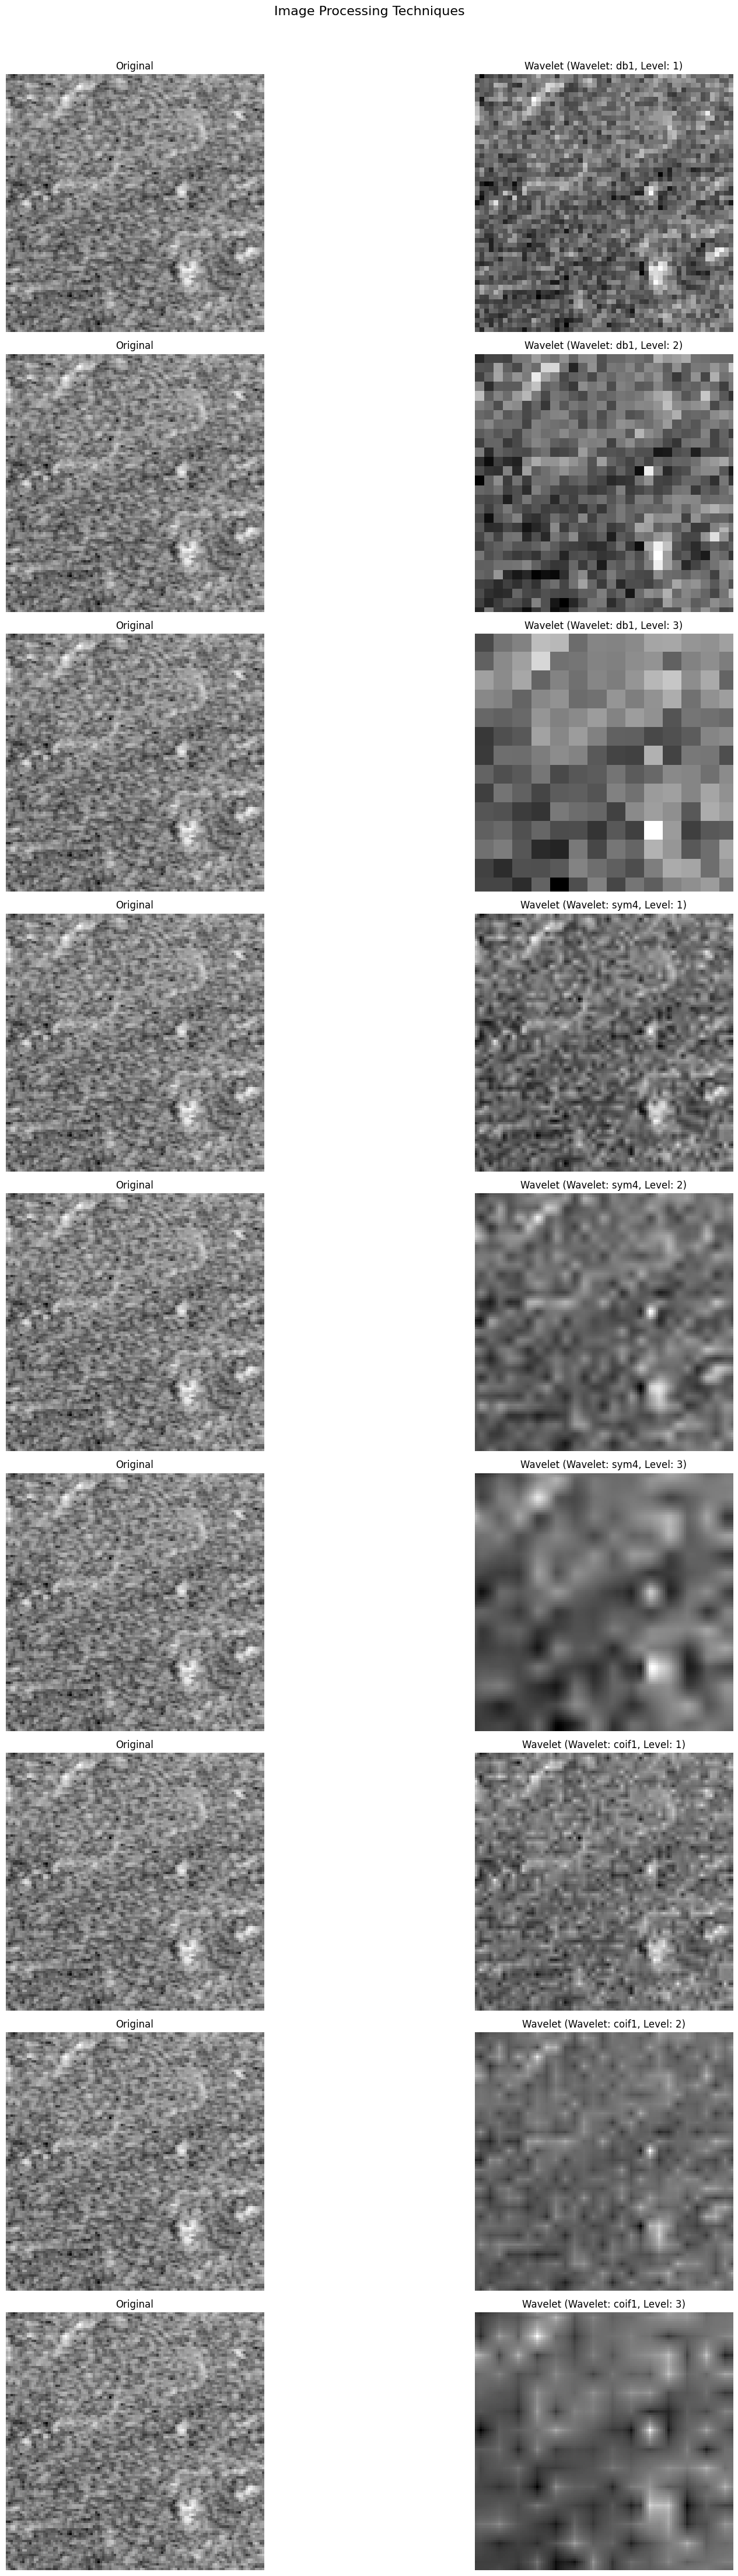

In [55]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import gaussian

# Função para realizar denoising com wavelet
def denoise_wavelet(image, wavelet='db1', level=1, thresholding='soft'):
    # Convertendo a imagem para o domínio wavelet
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    
    # Calculando o valor limiar (threshold)
    sigma = (1/0.6745) * np.median(np.abs(coeffs[-level] - np.median(coeffs[-level])))
    uthresh = sigma * np.sqrt(2 * np.log(image.size))
    
    # Aplicando o limiar (threshold)
    coeffs = list(coeffs)
    coeffs[1:] = [(pywt.threshold(c[0], value=uthresh, mode=thresholding),
                   pywt.threshold(c[1], value=uthresh, mode=thresholding),
                   pywt.threshold(c[2], value=uthresh, mode=thresholding)) for c in coeffs[1:]]
    
    # Reconstruindo a imagem a partir dos coeficientes limiares
    return pywt.waverec2(coeffs, wavelet)

# Experimentando com diferentes wavelets e níveis
wavelets = ['db1', 'sym4', 'coif1']
levels = [1, 2, 3]

# Inicializando o gráfico
fig, axes = plt.subplots(len(wavelets) * len(levels), 2, figsize=(20, len(wavelets) * len(levels) * 5))

fig.suptitle('Image Processing Techniques', fontsize=16)

for i, wavelet in enumerate(wavelets):
    for j, level in enumerate(levels):
        denoised_image = denoise_wavelet(example_image, wavelet=wavelet, level=level, thresholding='soft')
        
        row = i * len(levels) + j

        # Plotando imagem original
        axes[row, 0].imshow(example_image, cmap='gray')
        axes[row, 0].set_title('Original')
        axes[row, 0].axis('off')

        # Plotando imagem denoised com wavelet
        axes[row, 1].imshow(denoised_image, cmap='gray')
        axes[row, 1].set_title(f'Wavelet (Wavelet: {wavelet}, Level: {level})')
        axes[row, 1].axis('off')

# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


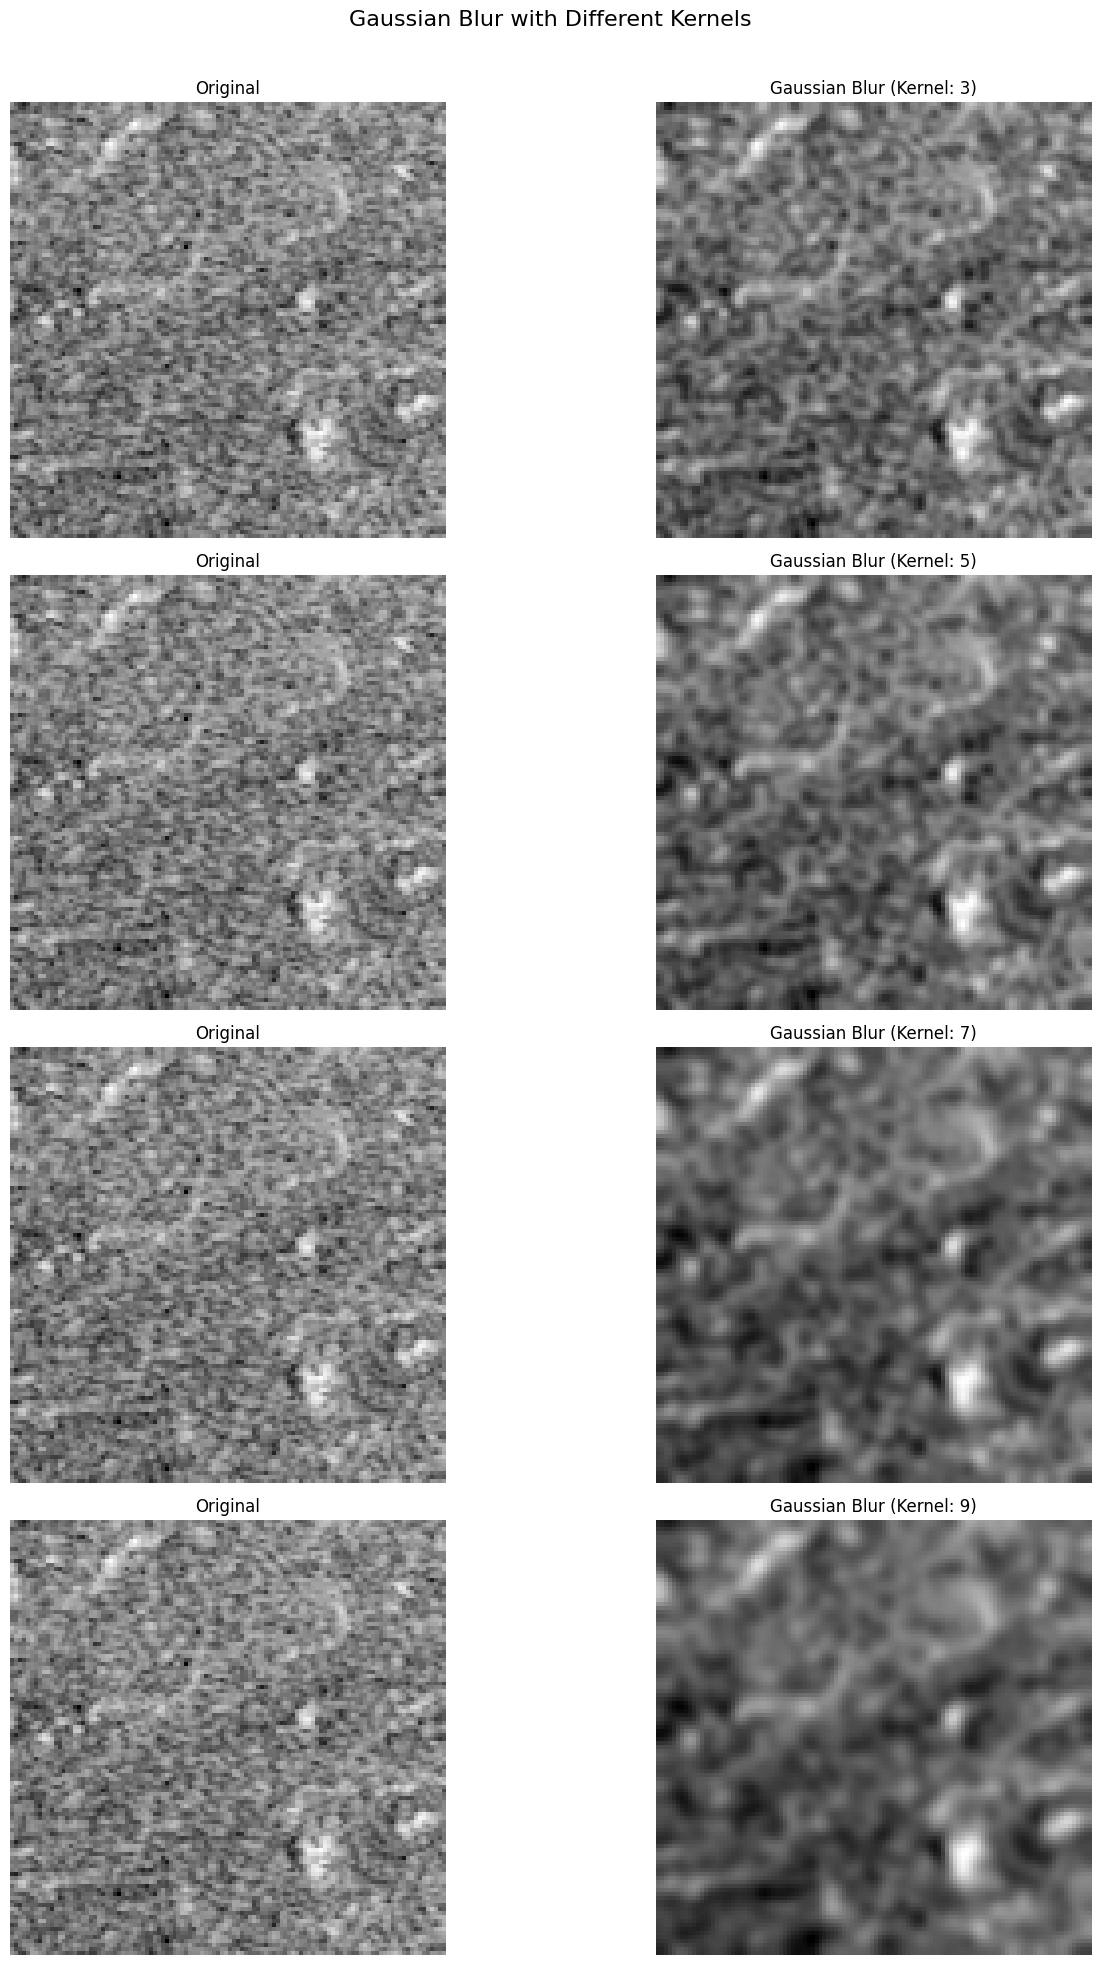

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, color

# Função para aplicar Gaussian Blur usando cv2
def apply_gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


# Certifique-se de que a imagem está em escala de cinza
if example_image.ndim == 3:
    example_image = color.rgb2gray(example_image)

# Definindo kernels
kernels = [3, 5, 7, 9]

# Inicializando o gráfico
fig, axes = plt.subplots(len(kernels), 2, figsize=(15, len(kernels) * 5))

fig.suptitle('Gaussian Blur with Different Kernels', fontsize=16)

for i, kernel in enumerate(kernels):
    # Aplicando Gaussian Blur
    blurred_image = apply_gaussian_blur(example_image, kernel)
        
    # Plotando imagem original
    axes[i, 0].imshow(example_image, cmap='gray')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Plotando imagem com Gaussian Blur
    axes[i, 1].imshow(blurred_image, cmap='gray')
    axes[i, 1].set_title(f'Gaussian Blur (Kernel: {kernel})')
    axes[i, 1].axis('off')

# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



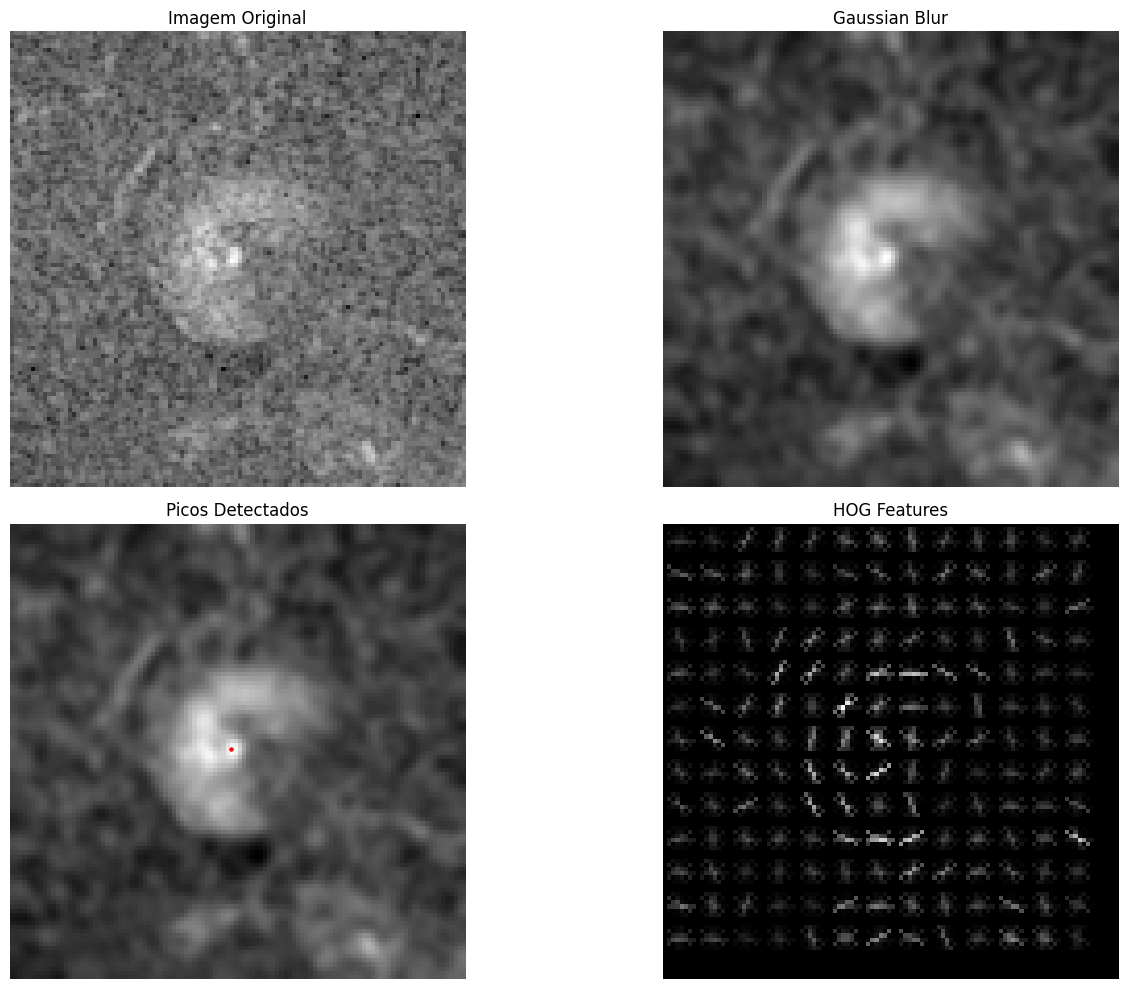

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from skimage.transform import integral_image
from skimage.feature import hog
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max



# Aplicando Gaussian Blur
kernel = 7
blurred_image = apply_gaussian_blur(example_image, kernel)

# Encontrar picos
peaks = peak_local_max(blurred_image, min_distance=20, threshold_rel=0.1)

# Extração de características HOG
hog_features, hog_image = hog(blurred_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Plotando resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].imshow(example_image, cmap='gray')
axes[0, 0].set_title('Imagem Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(blurred_image, cmap='gray')
axes[0, 1].set_title('Gaussian Blur')
axes[0, 1].axis('off')

axes[1, 0].imshow(blurred_image, cmap='gray')
axes[1, 0].set_title('Picos Detectados')
axes[1, 0].scatter(peaks[:, 1], peaks[:, 0], c='red', s=5)
axes[1, 0].axis('off')

axes[1, 1].imshow(hog_image, cmap='gray')
axes[1, 1].set_title('HOG Features')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


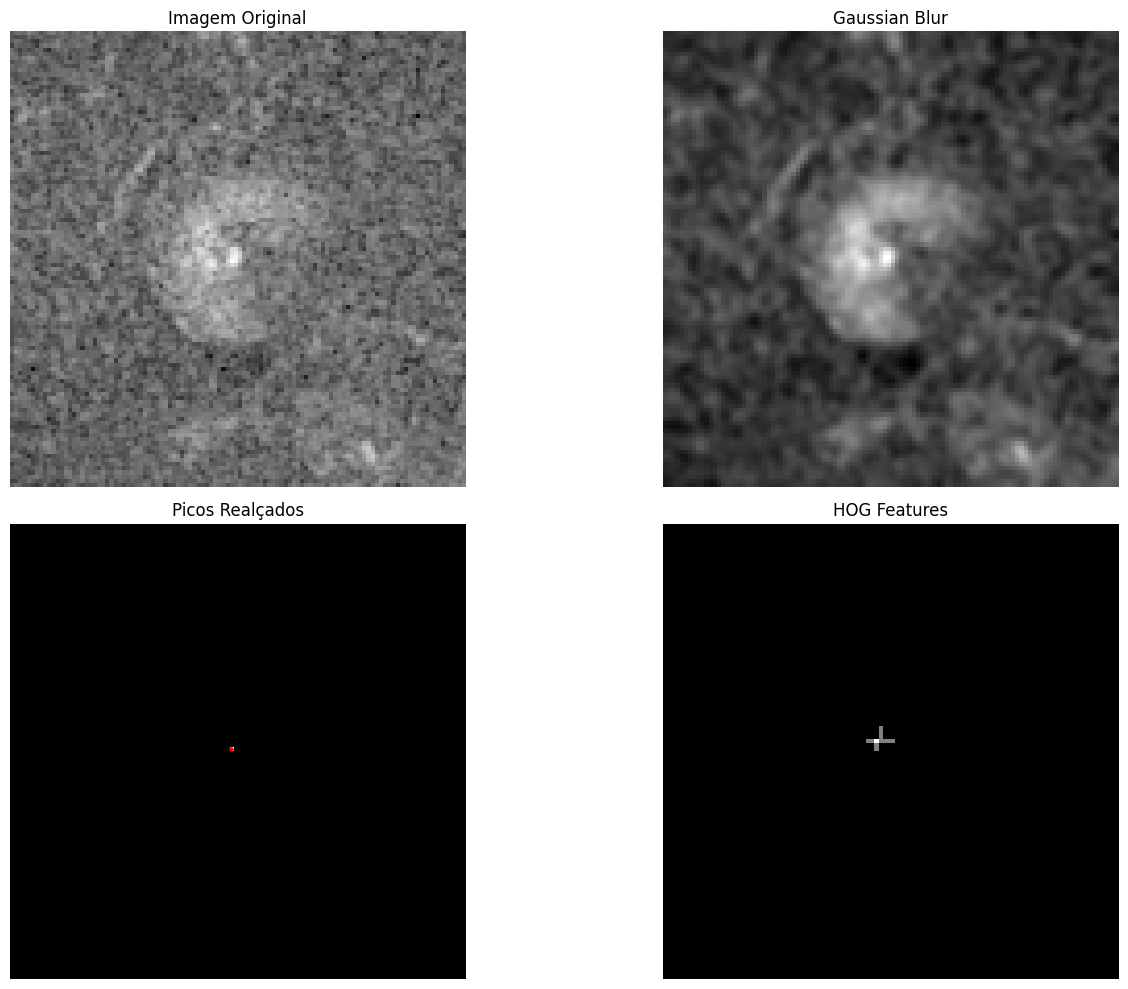

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, feature, restoration
from skimage.morphology import disk, closing
from skimage.feature import peak_local_max

# Função para aplicar Gaussian Blur usando cv2
def apply_gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


# Aplicando Gaussian Blur
blurred_image = apply_gaussian_blur(example_image, kernel_size=5)

# Encontrar picos
peaks = peak_local_max(blurred_image, min_distance=20, threshold_rel=0.1)

# Criar uma máscara com picos realçados
mask = np.zeros_like(blurred_image, dtype=bool)
for peak in peaks:
    mask[peak[0], peak[1]] = True

# Realçar os picos na imagem usando a máscara
enhanced_image = np.copy(blurred_image)
enhanced_image[mask] = 1

# Aplicar uma transformação morfológica para aprimorar o realce dos picos
selem = disk(10)
enhanced_image = closing(enhanced_image, selem)

# Reconstrução da imagem para melhorar o realce
reconstructed_image = restoration.denoise_wavelet(enhanced_image, wavelet='db1', mode='soft')

# Extração de características HOG
hog_features, hog_image = feature.hog(reconstructed_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Plotando resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Imagem Original
axes[0, 0].imshow(example_image, cmap='gray')
axes[0, 0].set_title('Imagem Original')
axes[0, 0].axis('off')

# Imagem com Gaussian Blur
axes[0, 1].imshow(blurred_image, cmap='gray')
axes[0, 1].set_title('Gaussian Blur')
axes[0, 1].axis('off')

# Imagem com Picos Realçados
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].scatter(peaks[:, 1], peaks[:, 0], c='red', s=5)
axes[1, 0].set_title('Picos Realçados')
axes[1, 0].axis('off')

# Imagem com Características HOG
axes[1, 1].imshow(hog_image, cmap='gray')
axes[1, 1].set_title('HOG Features')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()
